# Big Smart Sales Data

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store.

The data has 8523 rows of 12 variables.

**Problem**: Predict the sales of a store.



## Library Imports

In [95]:
#Data Munching
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns 


import typing

#Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Import

In [96]:
train_df_raw = pd.read_csv('Train.csv')

In [97]:
train_df_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
train_df_raw.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [99]:
train_df_raw.shape

(8523, 12)

In [100]:
def eda_df_construction(df: pd.DataFrame) -> pd.DataFrame:
    """create a quick exploratory data analysis as a dataframe that captures descriptive statistics for all the columns, not just numerical as in '.describe()'"""
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()

    return pd.DataFrame(eda_df)

In [101]:
eda_df_construction(train_df_raw)

,null_sum,null_pct,dtypes,count,mean,min,max
Item_Fat_Content,0,0.000000,object,8523,NaN,LF,reg
Item_Identifier,0,0.000000,object,8523,NaN,DRA12,NCZ54
Item_MRP,0,0.000000,float64,8523,140.992782,31.29,266.888
Item_Outlet_Sales,0,0.000000,float64,8523,2181.288914,33.29,13087
Item_Type,0,0.000000,object,8523,NaN,Baking Goods,Starchy Foods
Item_Visibility,0,0.000000,float64,8523,0.066132,0,0.328391
Item_Weight,1463,0.171653,float64,7060,12.857645,4.555,21.35
Outlet_Establishment_Year,0,0.000000,int64,8523,1997.831867,1985,2009
Outlet_Identifier,0,0.000000,object,8523,NaN,OUT010,OUT049
Outlet_Location_Type,0,0.000000,object,8523,NaN,Tier 1,Tier 3


Check Correlation of numeric variables with Target(Item_Outlet_Sales)

In [102]:
correlations = train_df_raw.corrwith(train_df_raw['Item_Outlet_Sales']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

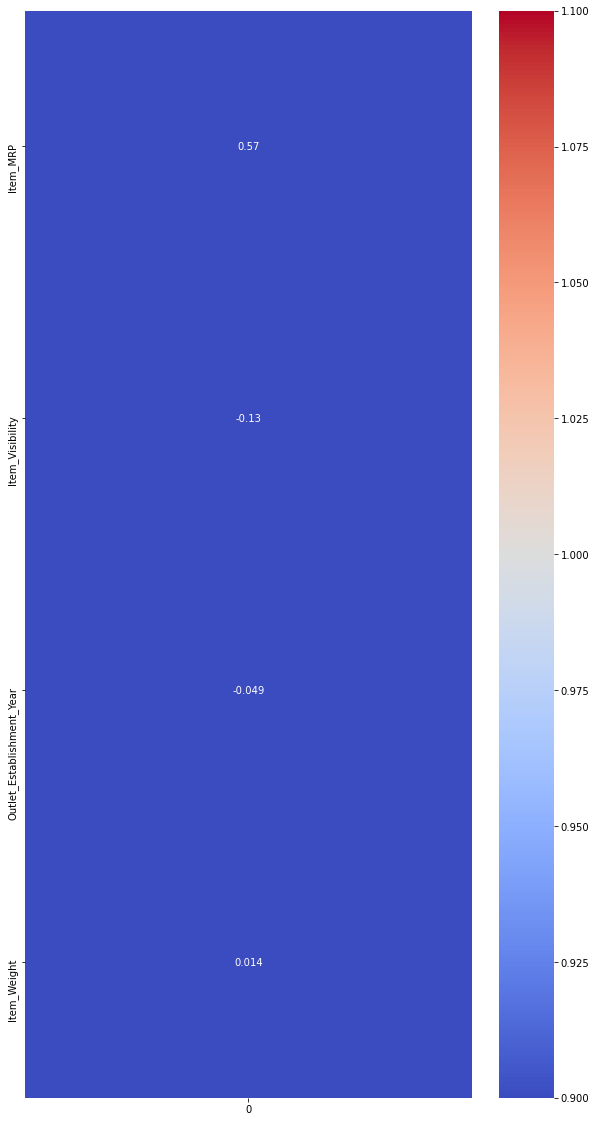

In [103]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=1, vmax=1, ax=ax);

In [104]:
train_df_raw.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [105]:
cols = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'Item_Identifier', 'Item_Type', 'Item_MRP', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Outlet_Sales']

df_ordered_cols = train_df_raw[cols]

In [106]:
df_ordered_cols = df_ordered_cols.drop(['Outlet_Size', 'Item_Weight'], axis=1)

In [107]:
eda_df_construction(df_ordered_cols)

,null_sum,null_pct,dtypes,count,mean,min,max
Item_Fat_Content,0,0.0,object,8523,NaN,LF,reg
Item_Identifier,0,0.0,object,8523,NaN,DRA12,NCZ54
Item_MRP,0,0.0,float64,8523,140.992782,31.29,266.888
Item_Outlet_Sales,0,0.0,float64,8523,2181.288914,33.29,13087
Item_Type,0,0.0,object,8523,NaN,Baking Goods,Starchy Foods
Item_Visibility,0,0.0,float64,8523,0.066132,0,0.328391
Outlet_Establishment_Year,0,0.0,int64,8523,1997.831867,1985,2009
Outlet_Identifier,0,0.0,object,8523,NaN,OUT010,OUT049
Outlet_Location_Type,0,0.0,object,8523,NaN,Tier 1,Tier 3
Outlet_Type,0,0.0,object,8523,NaN,Grocery Store,Supermarket Type3


In [108]:
def unique_values_by_feature(df: pd.DataFrame) -> dict:
    """Return a list of lists for categorical features and the categories they encompass"""
    #gather categorical column names
    cat_cols = df.loc[:, df.dtypes == object].columns.tolist()

    #cycle through the list and store unique values as a list
    results = {}
    for feature in cat_cols:
        results[feature] = df[feature].unique().tolist()

    return results


In [109]:
unique_categories_by_feature = unique_values_by_feature(df_ordered_cols)

In [110]:
unique_categories_by_feature.keys()

dict_keys(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type', 'Item_Identifier', 'Item_Type', 'Item_Fat_Content'])

In [111]:
unique_categories_by_feature['Item_Type']

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

Fix Item_Fat_Content to be consistent

In [112]:
unique_categories_by_feature['Item_Fat_Content']


['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

In [113]:
def clean_Item_Fat(x: str) -> str:
    cleaned_x = x.lower()
    if (cleaned_x == 'lf'):
        return 'low fat'
    elif (cleaned_x == 'reg'):
        return 'regular'
    else:
        return cleaned_x

In [114]:
df_ordered_cols['Corrected_Item_Fat_Content'] = df_ordered_cols['Item_Fat_Content'].apply(lambda x: clean_Item_Fat(x))

In [115]:
unique_categories_by_feature = unique_values_by_feature(df_ordered_cols)
unique_categories_by_feature['Corrected_Item_Fat_Content']

['low fat', 'regular']

create better feature for establishment year

In [116]:
df_ordered_cols['Years_In_Business'] = 2020 - df_ordered_cols['Outlet_Establishment_Year']

In [117]:
df_ordered_cols.head()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year,Item_Identifier,Item_Type,Item_MRP,Item_Fat_Content,Item_Visibility,Item_Outlet_Sales,Corrected_Item_Fat_Content,Years_In_Business
0,OUT049,Supermarket Type1,Tier 1,1999,FDA15,Dairy,249.8092,Low Fat,0.016047,3735.1380,low fat,21
1,OUT018,Supermarket Type2,Tier 3,2009,DRC01,Soft Drinks,48.2692,Regular,0.019278,443.4228,regular,11
2,OUT049,Supermarket Type1,Tier 1,1999,FDN15,Meat,141.6180,Low Fat,0.016760,2097.2700,low fat,21
3,OUT010,Grocery Store,Tier 3,1998,FDX07,Fruits and Vegetables,182.0950,Regular,0.000000,732.3800,regular,22
4,OUT013,Supermarket Type1,Tier 3,1987,NCD19,Household,53.8614,Low Fat,0.000000,994.7052,low fat,33


In [118]:
df_ordered_cols.drop(['Item_Fat_Content', 'Outlet_Establishment_Year'], axis=1, inplace=True)
df_ordered_cols.columns


Index(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type',
       'Item_Identifier', 'Item_Type', 'Item_MRP', 'Item_Visibility',
       'Item_Outlet_Sales', 'Corrected_Item_Fat_Content', 'Years_In_Business'],
      dtype='object')

In [119]:
columns = ['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type','Item_Identifier', 'Item_Type', 'Item_MRP', 'Item_Visibility', 'Corrected_Item_Fat_Content', 'Years_In_Business', 'Item_Outlet_Sales']
cleaned_DF = df_ordered_cols[columns]

In [120]:
correlations = cleaned_DF.corrwith(cleaned_DF['Item_Outlet_Sales']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

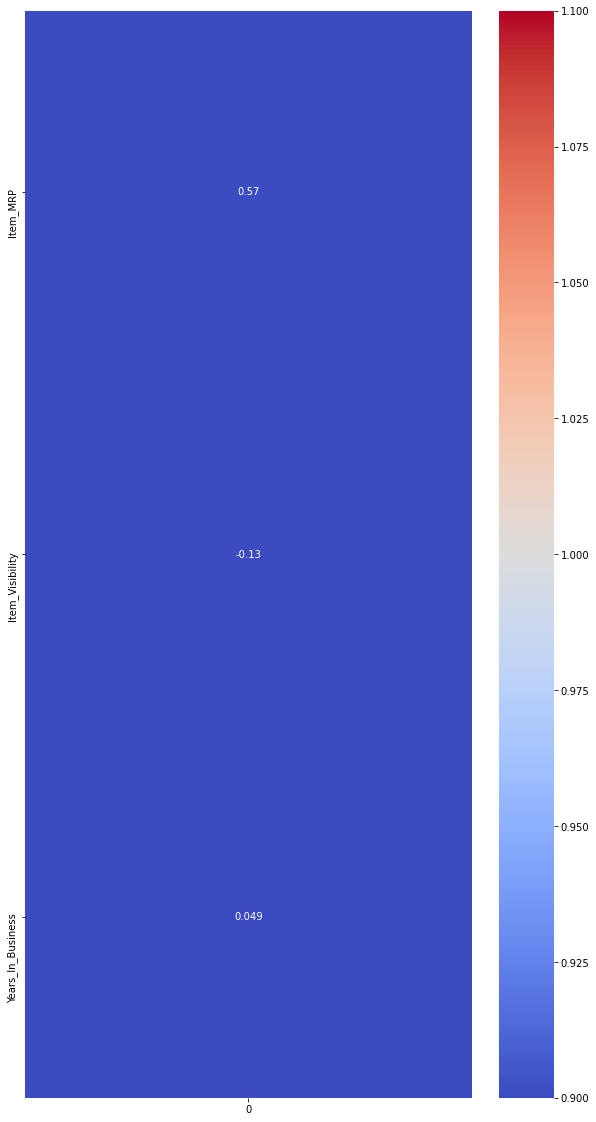

In [121]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=1, vmax=1, ax=ax);

In [122]:
cleaned_DF.head()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Item_Identifier,Item_Type,Item_MRP,Item_Visibility,Corrected_Item_Fat_Content,Years_In_Business,Item_Outlet_Sales
0,OUT049,Supermarket Type1,Tier 1,FDA15,Dairy,249.8092,0.016047,low fat,21,3735.1380
1,OUT018,Supermarket Type2,Tier 3,DRC01,Soft Drinks,48.2692,0.019278,regular,11,443.4228
2,OUT049,Supermarket Type1,Tier 1,FDN15,Meat,141.6180,0.016760,low fat,21,2097.2700
3,OUT010,Grocery Store,Tier 3,FDX07,Fruits and Vegetables,182.0950,0.000000,regular,22,732.3800
4,OUT013,Supermarket Type1,Tier 3,NCD19,Household,53.8614,0.000000,low fat,33,994.7052


In [123]:
cleaned_DF['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [124]:
#drop item mrp, item visability, fat content, 
outlet_level_df = cleaned_DF.drop(['Item_MRP', 'Item_Visibility', 'Corrected_Item_Fat_Content', 'Item_Identifier'], axis=1)
outlet_level_df.sort_values('Outlet_Identifier')

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Item_Type,Years_In_Business,Item_Outlet_Sales
4225,OUT010,Grocery Store,Tier 3,Breakfast,22,233.0300
1855,OUT010,Grocery Store,Tier 3,Health and Hygiene,22,262.3252
3055,OUT010,Grocery Store,Tier 3,Baking Goods,22,572.5880
3054,OUT010,Grocery Store,Tier 3,Frozen Foods,22,142.4812
953,OUT010,Grocery Store,Tier 3,Baking Goods,22,745.6960
...,...,...,...,...,...,...
5079,OUT049,Supermarket Type1,Tier 1,Health and Hygiene,21,669.1290
5073,OUT049,Supermarket Type1,Tier 1,Canned,21,2557.3378
5068,OUT049,Supermarket Type1,Tier 1,Fruits and Vegetables,21,3004.0896
4899,OUT049,Supermarket Type1,Tier 1,Fruits and Vegetables,21,5727.2116


In [125]:
#sum all item
outlet_level_df = outlet_level_df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type', 'Years_In_Business', 'Item_Type'], as_index=False).agg({'Item_Outlet_Sales': ['sum']})

outlet_level_dummied_df = pd.get_dummies(outlet_level_df)




In [126]:
outlet_level_dummied_df.head()

,"(Years_In_Business, )","(Item_Outlet_Sales, sum)","('Outlet_Identifier', '')_OUT010","('Outlet_Identifier', '')_OUT013","('Outlet_Identifier', '')_OUT017","('Outlet_Identifier', '')_OUT018","('Outlet_Identifier', '')_OUT019","('Outlet_Identifier', '')_OUT027","('Outlet_Identifier', '')_OUT035","('Outlet_Identifier', '')_OUT045",...,"('Item_Type', '')_Fruits and Vegetables","('Item_Type', '')_Hard Drinks","('Item_Type', '')_Health and Hygiene","('Item_Type', '')_Household","('Item_Type', '')_Meat","('Item_Type', '')_Others","('Item_Type', '')_Seafood","('Item_Type', '')_Snack Foods","('Item_Type', '')_Soft Drinks","('Item_Type', '')_Starchy Foods"
0,22,10693.4138,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,7657.3658,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,4081.3540,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,9019.5926,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,15307.4078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning

### Pre-process Data

In [127]:
np.shape(outlet_level_dummied_df)

(160, 35)

In [128]:
scaler = StandardScaler().fit(outlet_level_dummied_df)
outlet_level_dummied_scaled_df = pd.DataFrame(scaler.transform(outlet_level_dummied_df))

In [129]:
outlet_level_dummied_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.083069,-0.954084,3.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
1,-0.083069,-0.981540,3.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
2,-0.083069,-1.013879,3.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
3,-0.083069,-0.969221,3.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
4,-0.083069,-0.912358,3.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.201739,-0.618765,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,3.872983,-0.258199,-0.258199,-0.258199,-0.258199
156,-0.201739,-0.943830,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,3.872983,-0.258199,-0.258199,-0.258199
157,-0.201739,2.116592,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,3.872983,-0.258199,-0.258199
158,-0.201739,-0.168287,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,3.872983,-0.258199


In [130]:
X = outlet_level_dummied_scaled_df.drop(2, axis=1)
y = outlet_level_dummied_scaled_df[2]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=20)

In [132]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(112, 34)
(48, 34)
(112,)
(48,)


#### Base Line Model - Ordinary Least Squares Linear Regression

I chose this model because I am trying to predict a number from a set of features so a simpler model seems like the place to start for this problem. 

In [133]:
ols_lr = LinearRegression()
ols_lr.fit(X_train, y_train)
ols_lr_predictions = ols_lr.predict(X_test)


#### Metrics - Ordinary Least Squares Regression

In [134]:
print('Mean Absolute Error')

print(mean_absolute_error(y_test, ols_lr_predictions))

print('Root Mean Squared Error')

print(mean_squared_error(y_test, ols_lr_predictions)**(0.5))

print('R-Squared Score')

print(r2_score(y_test, ols_lr_predictions))

Mean Absolute Error
7.228014483236697e-16
Root Mean Squared Error
8.880699928646239e-16
R-Squared Score
1.0


Ordinary Least Squares did awful when data is scoped to the item level. 


Ordinary Least Squares did weirdly well when data is scoped to item_type level. Most likely overfitting. 

Ordinary Least Squares did awful when data is scoped only at the outlet level. This has to be because of the shape of the data (wider than long).

In [135]:
pd.merge(y_test, ols_lr_predictions

SyntaxError: unexpected EOF while parsing (<ipython-input-135-74578bbf65fa>, line 1)